<a href="https://colab.research.google.com/github/newguy7/DataScienceProjects/blob/main/Flood_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

data = pd.read_csv('train.csv')
print(data.shape)

(1117957, 22)


In [2]:
my_cols = data.columns
my_cols

Index(['id', 'MonsoonIntensity', 'TopographyDrainage', 'RiverManagement',
       'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality',
       'Siltation', 'AgriculturalPractices', 'Encroachments',
       'IneffectiveDisasterPreparedness', 'DrainageSystems',
       'CoastalVulnerability', 'Landslides', 'Watersheds',
       'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss',
       'InadequatePlanning', 'PoliticalFactors', 'FloodProbability'],
      dtype='object')

###Checking for the nan values

In [3]:
data.isna().sum()

id                                 0
MonsoonIntensity                   0
TopographyDrainage                 0
RiverManagement                    0
Deforestation                      0
Urbanization                       0
ClimateChange                      0
DamsQuality                        0
Siltation                          0
AgriculturalPractices              0
Encroachments                      0
IneffectiveDisasterPreparedness    0
DrainageSystems                    0
CoastalVulnerability               0
Landslides                         0
Watersheds                         0
DeterioratingInfrastructure        0
PopulationScore                    0
WetlandLoss                        0
InadequatePlanning                 0
PoliticalFactors                   0
FloodProbability                   0
dtype: int64

In [4]:
missing_values = data.isna().values.any()

print(f"Are there any missing values in the dataset?: {missing_values}")

Are there any missing values in the dataset?: False


### There are no any missing values in the dataset.

In [5]:
data.head()

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,0,5,8,5,8,6,4,4,3,3,...,5,3,3,5,4,7,5,7,3,0.445
1,1,6,7,4,4,8,8,3,5,4,...,7,2,0,3,5,3,3,4,3,0.450
2,2,6,5,6,7,3,7,1,5,4,...,7,3,7,5,6,8,2,3,3,0.530
3,3,3,4,6,5,4,8,4,7,6,...,2,4,7,4,4,6,5,7,5,0.535
4,4,5,3,2,6,4,4,3,3,3,...,2,2,6,6,4,1,2,3,5,0.415


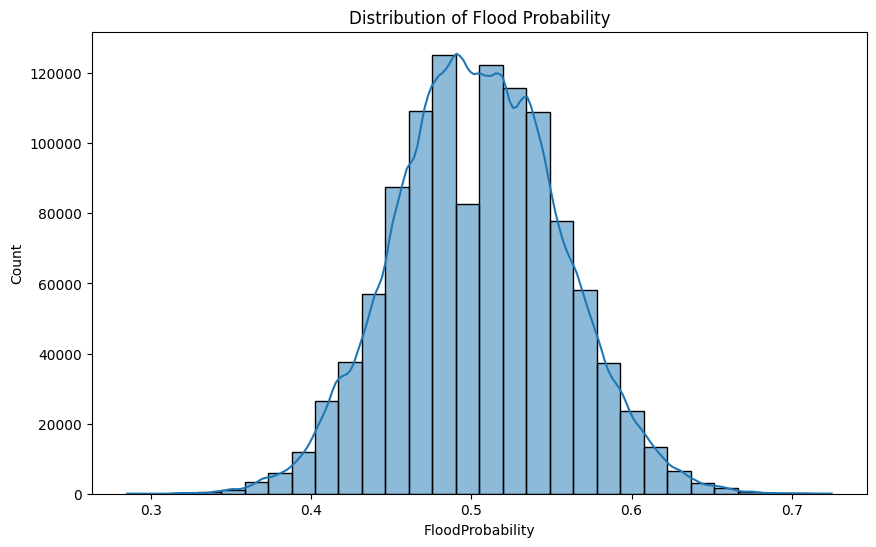

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the distribution of target variable 'FloodProbability'
plt.figure(figsize=(10, 6))
sns.histplot(data['FloodProbability'], kde=True, bins=30)
plt.title('Distribution of Flood Probability')
plt.show()


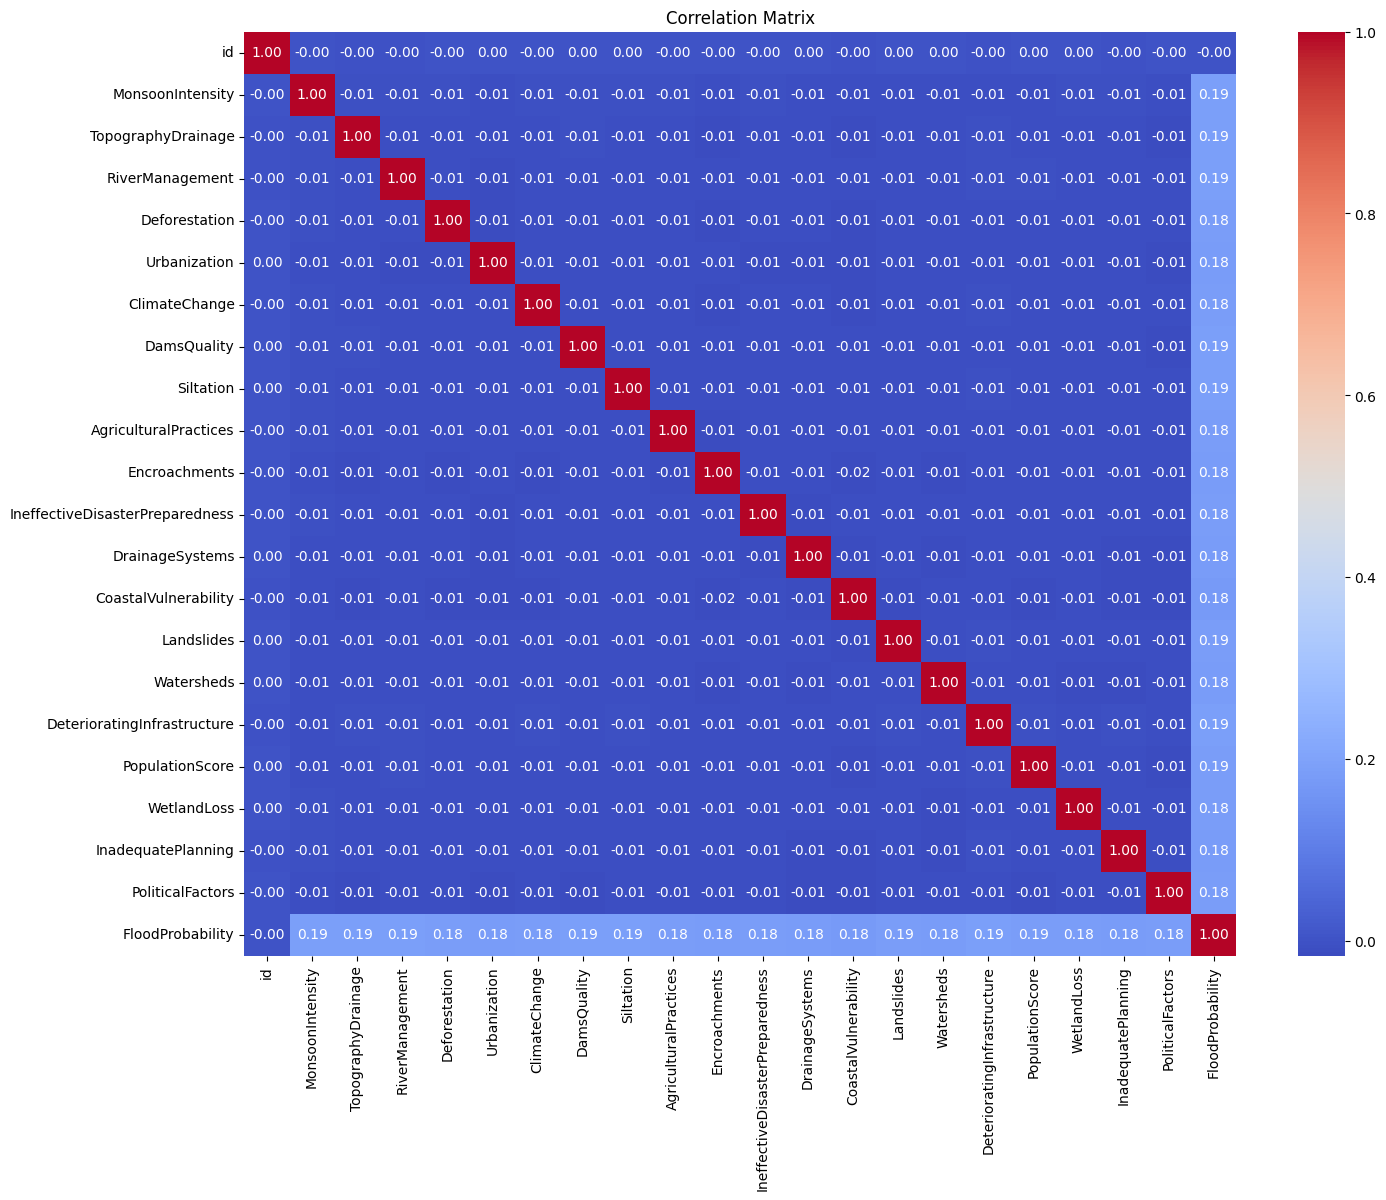

In [7]:
# Visualize correlation matrix
plt.figure(figsize=(16, 12))
sns.heatmap(data.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [9]:
data.corr()

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
id,1.000000,-0.000093,-0.001518,-0.000413,-0.000080,0.000580,-0.000188,0.000133,0.000281,-0.000103,...,0.000558,-0.001386,0.001078,0.000215,-0.000385,0.000625,0.000931,-0.001535,-0.000155,-0.000184
MonsoonIntensity,-0.000093,1.000000,-0.007362,-0.008070,-0.007251,-0.009309,-0.008031,-0.007787,-0.007836,-0.008232,...,-0.009716,-0.010659,-0.009121,-0.008900,-0.008486,-0.008679,-0.006811,-0.008155,-0.008474,0.189098
TopographyDrainage,-0.001518,-0.007362,1.000000,-0.009924,-0.008548,-0.010532,-0.009619,-0.007607,-0.009824,-0.009496,...,-0.010056,-0.012526,-0.010240,-0.011067,-0.006628,-0.010815,-0.010267,-0.011617,-0.012350,0.187635
RiverManagement,-0.000413,-0.008070,-0.009924,1.000000,-0.008574,-0.012292,-0.009237,-0.008711,-0.010058,-0.010783,...,-0.011277,-0.011680,-0.008994,-0.011412,-0.005827,-0.006727,-0.010069,-0.009673,-0.011550,0.187131
Deforestation,-0.000080,-0.007251,-0.008548,-0.008574,1.000000,-0.012248,-0.008266,-0.009356,-0.011536,-0.010039,...,-0.010490,-0.012388,-0.009257,-0.010671,-0.008862,-0.011777,-0.011004,-0.010424,-0.009661,0.184001
Urbanization,0.000580,-0.009309,-0.010532,-0.012292,-0.012248,1.000000,-0.011199,-0.011128,-0.010153,-0.010559,...,-0.012572,-0.014497,-0.010582,-0.012107,-0.010656,-0.011485,-0.011023,-0.011584,-0.013005,0.180861
ClimateChange,-0.000188,-0.008031,-0.009619,-0.009237,-0.008266,-0.011199,1.000000,-0.008427,-0.009457,-0.011517,...,-0.009650,-0.013005,-0.009352,-0.009882,-0.006324,-0.010332,-0.009376,-0.010772,-0.011379,0.184761
DamsQuality,0.000133,-0.007787,-0.007607,-0.008711,-0.009356,-0.011128,-0.008427,1.000000,-0.009401,-0.009033,...,-0.010439,-0.012096,-0.009924,-0.009085,-0.009831,-0.009599,-0.009372,-0.011374,-0.013081,0.187996
Siltation,0.000281,-0.007836,-0.009824,-0.010058,-0.011536,-0.010153,-0.009457,-0.009401,1.000000,-0.010179,...,-0.010702,-0.011762,-0.009173,-0.009457,-0.006312,-0.008739,-0.008667,-0.009079,-0.008493,0.186789
AgriculturalPractices,-0.000103,-0.008232,-0.009496,-0.010783,-0.010039,-0.010559,-0.011517,-0.009033,-0.010179,1.000000,...,-0.010845,-0.011415,-0.010624,-0.009901,-0.008708,-0.008958,-0.011392,-0.010418,-0.011157,0.183366


In [10]:
data.describe()

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
count,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,...,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06
mean,5.589780e+05,4.921450e+00,4.926671e+00,4.955322e+00,4.942240e+00,4.942517e+00,4.934093e+00,4.955878e+00,4.927791e+00,4.942619e+00,...,4.946893e+00,4.953999e+00,4.931376e+00,4.929032e+00,4.925907e+00,4.927520e+00,4.950859e+00,4.940587e+00,4.939004e+00,5.044803e-01
std,3.227265e+05,2.056387e+00,2.093879e+00,2.072186e+00,2.051689e+00,2.083391e+00,2.057742e+00,2.083063e+00,2.065992e+00,2.068545e+00,...,2.072333e+00,2.088899e+00,2.078287e+00,2.082395e+00,2.064813e+00,2.074176e+00,2.068696e+00,2.081123e+00,2.090350e+00,5.102610e-02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.850000e-01
25%,2.794890e+05,3.000000e+00,3.000000e+00,4.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,...,4.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,4.700000e-01
50%,5.589780e+05,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,...,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.050000e-01
75%,8.384670e+05,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,...,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,5.400000e-01
max,1.117956e+06,1.600000e+01,1.800000e+01,1.600000e+01,1.700000e+01,1.700000e+01,1.700000e+01,1.600000e+01,1.600000e+01,1.600000e+01,...,1.700000e+01,1.700000e+01,1.600000e+01,1.600000e+01,1.700000e+01,1.800000e+01,1.900000e+01,1.600000e+01,1.600000e+01,7.250000e-01


In [11]:
# Split data into features and target
X = data.drop(columns=['id','FloodProbability'],axis=1).values
y =data['FloodProbability'].values

In [13]:
X

array([[5, 8, 5, ..., 5, 7, 3],
       [6, 7, 4, ..., 3, 4, 3],
       [6, 5, 6, ..., 2, 3, 3],
       ...,
       [7, 3, 9, ..., 5, 2, 4],
       [7, 3, 3, ..., 7, 6, 4],
       [4, 5, 6, ..., 7, 7, 8]])

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state=42)

In [16]:
from sklearn.preprocessing import StandardScaler

# Scaling the features
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

##Linear Regressor

In [17]:
from sklearn.linear_model import LinearRegression
# Initializing multiple linear regression model
regression = LinearRegression()

In [18]:
# training the multiple linear regression model
regression.fit(X_train, y_train)

LinearRegression()

Cross Validating the training dataset

In [19]:
from sklearn.model_selection import cross_val_score

validation_score = cross_val_score(estimator=regression,X=X_train,y=y_train, scoring='r2', cv=5 )

In [20]:
validation_score

array([0.84528566, 0.8447432 , 0.84594197, 0.84415817, 0.84497963])

In [21]:
import numpy as np
avg_validation_score = np.mean(validation_score)
avg_validation_score

0.8450217286987352

##Prediction

In [22]:
y_pred = regression.predict(X_test)

In [23]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [24]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2score = r2_score(y_test, y_pred)

print('mse:',mse)
print('mae:',mae)
print('rmse:',rmse)
print('r2score:',r2score)

mse: 0.0004034520600637504
mae: 0.015798241151130963
rmse: 0.02008611610201809
r2score: 0.8447057763250224


In [25]:
# Adjusted R2 = 1-[(1-R2)*(n-1)/(n-k-1)]
#display adjusted R-square
print(1-(1-r2score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

0.8446946628044762


In [26]:
residuals = y_test - y_pred
print(residuals)

[ 0.02610105 -0.00986613 -0.01257938 ... -0.00945532  0.00902227
  0.04438637]


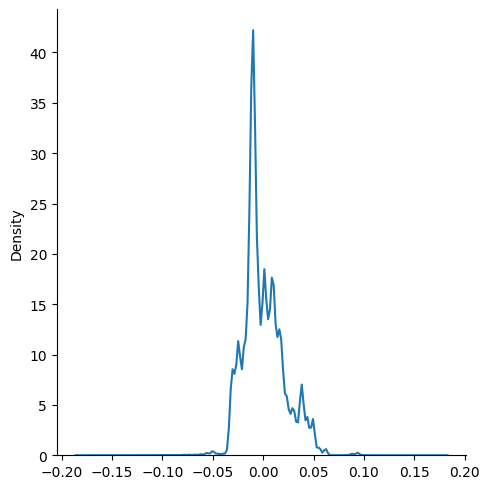

In [27]:
# Plot the residuals
sns.displot(residuals, kind='kde')

In [28]:
#OLS Linear Regression
import statsmodels.api as sm

model = sm.OLS(y_train,X_train).fit()

In [29]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.009
Model:                            OLS   Adj. R-squared (uncentered):              0.009
Method:                 Least Squares   F-statistic:                              362.1
Date:                Tue, 28 May 2024   Prob (F-statistic):                        0.00
Time:                        23:45:54   Log-Likelihood:                     -6.1671e+05
No. Observations:              838467   AIC:                                  1.233e+06
Df Residuals:                  838447   BIC:                                  1.234e+06
Df Model:                          20                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0116      0.001     20.932      0.000       0.010       0.013
x2             0.0118      0.001     21.393      0.000       0.011       0.013
x3             0.0117      0.001     21.244      0.000       0.011       0.013
x4             0.0117      0.001     21.108      0.000       0.011       0.013
x5             0.0118      0.001     21.334      0.000       0.011       0.013
x6             0.0116      0.001     21.087      0.000       0.011       0.013
x7             0.0118      0.001     21.334      0.000       0.011       0.013
x8             0.0117      0.001     21.131      0.000       0.011       0.013
x9             0.0117      0.001     21.110      0.000       0.011       0.013
x10            0.0118      0.001     21.302      0.000       0.011       0.013
x11            0.0117      0.001     21.234      0.000       0.011       0.013
x12            0.0117      0.001     21.135      0.000       0.011       0.013
x13            0.0118      0.001     21.431      0.000       0.011       0.013
x14            0.0117      0.001     21.227      0.000       0.011       0.013
x15            0.0118      0.001     21.301      0.000       0.011       0.013
x16            0.0116      0.001     21.023      0.000       0.011       0.013
x17            0.0118      0.001     21.358      0.000       0.011       0.013
x18            0.0117      0.001     21.116      0.000       0.011       0.013
x19            0.0117      0.001     21.138      0.000       0.011       0.013
x20            0.0118      0.001     21.361      0.000       0.011       0.013
==============================================================================
Omnibus:                    75456.545   Durbin-Watson:                   0.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           112091.309
Skew:                           0.705   Prob(JB):                         0.00
Kurtosis:                       4.105   Cond. No.                         1.13
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
print(regression.coef_)

[0.01155147 0.01181039 0.01172753 0.01165319 0.01178088 0.01164148
 0.01177699 0.01166376 0.01165523 0.01176592 0.01172398 0.01167063
 0.01183869 0.01171837 0.01176184 0.01160207 0.01179123 0.01165791
 0.01167183 0.01179525]


##XGBooster Regressor

In [31]:
from xgboost import XGBRegressor

In [32]:
# Instantiation
model = XGBRegressor()

# Fitting the model
model.fit(X_train, y_train)

# Predict the model
pred_lbls = model.predict(X_test)
print(pred_lbls)

[0.5342439  0.5939715  0.5191376  ... 0.53818524 0.56441534 0.4665067 ]


In [35]:
mse_xg = mean_squared_error(y_test, pred_lbls)
mae_xg = mean_absolute_error(y_test, pred_lbls)
rmse_xg = np.sqrt(mse)
r2score_xg = r2_score(y_test, pred_lbls)

print('mse:',mse_xg)
print('mae:',mae_xg)
print('rmse:',rmse_xg)
print('r2score:',r2score_xg)

mse: 0.0004957682447203903
mae: 0.01757653826467253
rmse: 0.02008611610201809
r2score: 0.8091720124705921


##Random Forest Regressor

In [44]:
#Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

forest_regg = RandomForestRegressor(n_estimators=20)

# Fitting the model
forest_regg.fit(X_train, y_train)

# Predict the model
pred_lbls_rf = forest_regg.predict(X_test)
print(pred_lbls_rf)


[0.51225 0.518   0.53975 ... 0.5215  0.51575 0.47425]


In [45]:
mse_rf = mean_squared_error(y_test, pred_lbls_rf)
mae_rf = mean_absolute_error(y_test, pred_lbls_rf)
rmse_rf = np.sqrt(mse)
r2score_rf = r2_score(y_test, pred_lbls_rf)

print('mse:',mse_rf)
print('mae:',mae_rf)
print('rmse:',rmse_rf)
print('r2score:',r2score_rf)

mse: 0.0009693265877133349
mae: 0.025321320977494722
rmse: 0.02008611610201809
r2score: 0.6268929203071323


## Decision Tree Regressor

In [40]:
from sklearn.tree import DecisionTreeRegressor

dec_tree = DecisionTreeRegressor()

# Fitting the model
dec_tree.fit(X_train, y_train)

# Predict the model
pred_lbls_dt = dec_tree.predict(X_test)
print(pred_lbls_dt)

[0.52  0.52  0.56  ... 0.53  0.475 0.51 ]


In [41]:
mse_dt = mean_squared_error(y_test, pred_lbls_dt)
mae_dt = mean_absolute_error(y_test, pred_lbls_dt)
rmse_dt = np.sqrt(mse)
r2score_dt = r2_score(y_test, pred_lbls_dt)

print('mse:',mse_dt)
print('mae:',mae_dt)
print('rmse:',rmse_dt)
print('r2score:',r2score_dt)

mse: 0.0024743560592507784
mae: 0.03953892804751512
rmse: 0.02008611610201809
r2score: 0.047586463541394175


##Support Vector Regressor

In [42]:
from sklearn.svm import SVR

svr = SVR()

# Fitting the model
svr.fit(X_train, y_train)

# Predict the model
pred_lbls_svr = svr.predict(X_test)
print(pred_lbls_svr)

[0.53735375 0.55226601 0.55427822 ... 0.55379162 0.55767623 0.42857879]


In [43]:
mse_svr = mean_squared_error(y_test, pred_lbls_svr)
mae_svr = mean_absolute_error(y_test, pred_lbls_svr)
rmse_svr = np.sqrt(mse)
r2score_svr = r2_score(y_test, pred_lbls_svr)

print('mse:',mse_svr)
print('mae:',mae_svr)
print('rmse:',rmse_svr)
print('r2score:',r2score_svr)

mse: 0.0008960432595805255
mae: 0.024477683398732953
rmse: 0.02008611610201809
r2score: 0.6551006770079038


In [46]:
# tabular report with different metrics for each model

data_rep = {
    'r2_Score' : [r2score,r2score_xg, r2score_rf,r2score_dt,r2score_svr]
}
index = ['Linear Regressor', 'XGBoost Regressor', 'Random Forest Regressor', 'Decision Tree Regressor', 'Support Vector Regressor']

df = pd.DataFrame(data_rep,index=index)
df

,r2_Score
Linear Regressor,0.844706
XGBoost Regressor,0.809172
Random Forest Regressor,0.626893
Decision Tree Regressor,0.047586
Support Vector Regressor,0.655101


##Making Prediction on test dataset using the best model: Linear Regressor

In [60]:
#load the test dataset
test_df = pd.read_csv('test.csv')

In [61]:
#check for nan values
test_df.isna().sum()

id                                 0
MonsoonIntensity                   0
TopographyDrainage                 0
RiverManagement                    0
Deforestation                      0
Urbanization                       0
ClimateChange                      0
DamsQuality                        0
Siltation                          0
AgriculturalPractices              0
Encroachments                      0
IneffectiveDisasterPreparedness    0
DrainageSystems                    0
CoastalVulnerability               0
Landslides                         0
Watersheds                         0
DeterioratingInfrastructure        0
PopulationScore                    0
WetlandLoss                        0
InadequatePlanning                 0
PoliticalFactors                   0
dtype: int64

In [62]:
test_df.columns


Index(['id', 'MonsoonIntensity', 'TopographyDrainage', 'RiverManagement',
       'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality',
       'Siltation', 'AgriculturalPractices', 'Encroachments',
       'IneffectiveDisasterPreparedness', 'DrainageSystems',
       'CoastalVulnerability', 'Landslides', 'Watersheds',
       'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss',
       'InadequatePlanning', 'PoliticalFactors'],
      dtype='object')

In [63]:
test_X = test_df.drop(['id'],axis=1).values

In [64]:
test_X = scalar.transform(test_X)

In [71]:
# Make predictions
pred_lbls = np.round(regression.predict(test_X),2)

# Creating DataFrame to store the results
submission = pd.DataFrame({
    'id': test_df['id'],
    'FloodProbability': pred_lbls
})

# Saving the results
submission.to_csv('submission.csv', index=False)